In [75]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm

In [76]:
#defined a function to calculate implied volatility using newton rhampson method
#S = stock price
#r = risk free intefrest rate
#T = time maturity
#K = strike price
#c_market = market prices of european calls
#tol = tolerance

def implied_volatility(S, r, T, K, C_market, sigma_0, tol):

    k1= True
    while k1:
        d1 = ( log(S/K) + (r+sigma_0*sigma_0/2.0)*T ) / ( sigma_0*sqrt(T) )
        d2 = d1 - sigma_0*sqrt(T)
        C = S*cumu_distr_func(d1) - K*np.exp(-r*T)*cumu_distr_func(d2)
        delta_x = S  * sqrt(T)  * normal_distr_func(d1)
        sigma_x = sigma_0 - (C - C_market)/delta_x
        if abs(sigma_x - sigma_0) < tol or abs(sigma_x - C_market) < tol:
            break
            k1= False
        sigma_0 = sigma_x
    return sigma_x

def normal_distr_func(x):      #calculated normal distribution
    return np.exp(-.5*x**2) / (sqrt(2*np.pi))
def cumu_distr_func(x):       #calculate cumulated distribution
    return (1 + erf(x/sqrt(2))) / 2

In [77]:
#inputs

sigma_0 = 0.1
K = [*range(124, 137, 1)]
S0 = 129
r = 0
T = 30/360
C_market = [6.03, 5.23, 4.49, 3.79, 3.14, 2.55, 2.02, 1.59, 1.26, 1.00, 0.81, 0.67, 0.55]
tol = 1e-10

K= [124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]
C= [6.03, 5.23, 4.49, 3.79, 3.14, 2.55, 2.02, 1.59, 1.26, 1.0, 0.81, 0.67, 0.55]


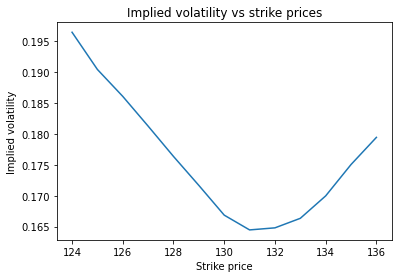

In [78]:

A = np.zeros(len(C_market))
for i in range(0, len(C_market)):
    A[i] = implied_volatility(S0, r, T, K[i], C_market[i], sigma_0, tol)
plt.plot(K, A)
plt.title('Implied volatility vs strike prices')
plt.ylabel('Implied volatility')
plt.xlabel('Strike price')
print('K=' , K)
print('C=' , C_market)

In [79]:
print(A)

[0.19647977 0.1904496  0.18608728 0.18126871 0.17635777 0.17166251
 0.16684766 0.1644535  0.16478949 0.16633324 0.16996648 0.17504866
 0.17944652]


In [80]:
#new input values

Time = [1/12, 1/4, 1/2, 1]
Value = [2.55, 4.49, 6.70, 10.13]
Price = 129
Strike = 129
Rate = 0
Sigma_0 = 0.2
Tol = 1e-10

[0.17166251156180468, 0.17454779722667496, 0.18424558003684322, 0.19715718426746315]


Text(0.5, 0, 'Time')

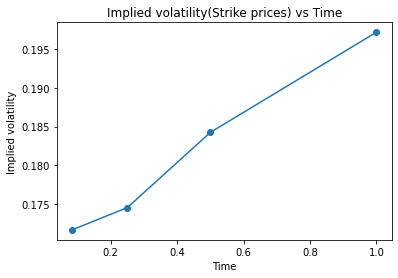

In [81]:
#calculating implied volatilities
imp=[]
for i in range(len(Value)):
    imp.append(implied_volatility(Price, Rate, Time[i], Strike, Value[i], Sigma_0, Tol))
print(imp)
plt.plot(Time, imp, marker='o')
plt.title("Implied volatility(Strike prices) vs Time")
plt.ylabel("Implied volatility")
plt.xlabel("Time")

In [181]:
# solving the volatilty function bybusing optmization method (newton squares method)

def func(t, sigma_0, a, b):
    return sigma_0 * np.exp(-a*t) + b*(1-np.exp(-a*t))

In [182]:
# to calculate parameters used this library

para, pcov = opt.curve_fit(func, Time, imp, method='lm')
print('sigma0 = %.6f' %para[0], ' a = %.6f' %para[1], ' b = %.6f' %para[2])

sigma0 = 0.168393  a = 0.140049  b = 0.389585


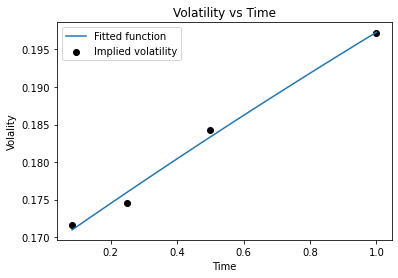

In [183]:

t = np.linspace(1/12, 1, 50)
y = func(t, para[0], para[1], para[2])
plt.plot(t, y, label='Fitted function')
plt.scatter(Time, imp, label='Implied volatility', color='black')
plt.title("Volatility vs Time")
plt.xlabel("Time")
plt.ylabel("Volality")
plt.legend()
plt.show()

In [ ]:
t = np.linspace(1/12, 1, 50)
y = func(t, para[0], para[1], para[2])
plt.plot(t, y, label='Fitted function')
plt.scatter(Time, imp, label='Implied volatility', color='black')
plt.title("Volatility vs Time")
plt.xlabel("Time")
plt.ylabel("Volality")
plt.legend()
plt.show()